In [29]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import glob
import matplotlib.pyplot as plt

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

# Set global scikit-learn configuration 
from sklearn import set_config

# Display estimators as a diagram
set_config(display='diagram')

In [30]:
## Checking what data we already in our Data folder using os.listdir
import os
FOLDER = './/Data//'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_tata_2018.csv.gz',
 'final_tmdb_tata_2019.csv.gz',
 'final_tmdb_tata_2020.csv.gz',
 'final_tmdb_tata_2021.csv.gz',
 'title-akas-us-only.csv',
 'title.basics.csv.gz',
 'title.ratings.csv.gz',
 'titles_basics.sql',
 'tmdb_api_results2018.json',
 'tmdb_api_results2019.json',
 'tmdb_api_results2020.json',
 'tmdb_api_results2021.json']

In [31]:
# Make a filepath query
q = FOLDER+"*.csv.gz"
print(q)

.//Data//*.csv.gz


In [32]:
# Use glob.glob to get COMPLETE filepaths
file_list = glob.glob(q)
file_list

['.//Data\\combined_tmdb_data.csv.gz',
 './/Data\\final_tmdb_tata_2018.csv.gz',
 './/Data\\final_tmdb_tata_2019.csv.gz',
 './/Data\\final_tmdb_tata_2020.csv.gz',
 './/Data\\final_tmdb_tata_2021.csv.gz',
 './/Data\\title.basics.csv.gz',
 './/Data\\title.ratings.csv.gz']

In [33]:
# Use glob.glob to get COMPLETE filepaths and sort
q = FOLDER+"final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list



.//Data//final_*.csv.gz


['.//Data\\final_tmdb_tata_2018.csv.gz',
 './/Data\\final_tmdb_tata_2019.csv.gz',
 './/Data\\final_tmdb_tata_2020.csv.gz',
 './/Data\\final_tmdb_tata_2021.csv.gz']

In [34]:
# Use glob.glob to get COMPLETE filepaths
q = FOLDER+"/**/final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q,recursive=True))
file_list

.//Data///**/final_*.csv.gz


['.//Data\\final_tmdb_tata_2018.csv.gz',
 './/Data\\final_tmdb_tata_2019.csv.gz',
 './/Data\\final_tmdb_tata_2020.csv.gz',
 './/Data\\final_tmdb_tata_2021.csv.gz']

In [35]:
df = pd.concat([pd.read_csv(f) for f in file_list])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0069049,0.0,/wXUcSJG6dqNKgIRgqYqX98UA1wz.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}]",https://www.netflix.com/title/80085566,299782.0,en,The Other Side of the Wind,...,0.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,40 years in the making.,The Other Side of the Wind,0.0,6.701,189.0,R
2,tt0192528,0.0,/gkBxjhtVEqgxOiRwRfWw1j7ez6K.jpg,NaN,5000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,567662.0,en,Reverse Heaven,...,0.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heaven's in trouble and there's one man who ca...,Heaven & Hell,0.0,6.000,7.0,NaN
3,tt0360556,0.0,/7oy4miyq4WYYy0xtX6lbNVPrEsr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",https://www.hbo.com/movies/fahrenheit-451,401905.0,en,Fahrenheit 451,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Knowledge is a dangerous thing,Fahrenheit 451,0.0,5.423,782.0,PG-13
4,tt0365545,0.0,/ljTYcQ3pkzYF52Z8ev1Z1UThnPy.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",https://www.netflix.com/title/80189630,519035.0,en,Nappily Ever After,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let yourself grow,Nappily Ever After,0.0,7.189,786.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,6.400,4.0,NaN
4050,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,5.846,13.0,PG-13
4051,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.600,35.0,NaN
4052,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,5.333,3.0,NaN


In [36]:
df = df.loc[df['imdb_id']!='0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0069049,0.0,/wXUcSJG6dqNKgIRgqYqX98UA1wz.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}]",https://www.netflix.com/title/80085566,299782.0,en,The Other Side of the Wind,...,0.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,40 years in the making.,The Other Side of the Wind,0.0,6.701,189.0,R
2,tt0192528,0.0,/gkBxjhtVEqgxOiRwRfWw1j7ez6K.jpg,NaN,5000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,567662.0,en,Reverse Heaven,...,0.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heaven's in trouble and there's one man who ca...,Heaven & Hell,0.0,6.000,7.0,NaN
3,tt0360556,0.0,/7oy4miyq4WYYy0xtX6lbNVPrEsr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",https://www.hbo.com/movies/fahrenheit-451,401905.0,en,Fahrenheit 451,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Knowledge is a dangerous thing,Fahrenheit 451,0.0,5.423,782.0,PG-13
4,tt0365545,0.0,/ljTYcQ3pkzYF52Z8ev1Z1UThnPy.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",https://www.netflix.com/title/80189630,519035.0,en,Nappily Ever After,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let yourself grow,Nappily Ever After,0.0,7.189,786.0,NaN
5,tt0427543,0.0,/5dq9ApDItoMisSoeH3pRqcvkTch.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,499566.0,en,A Million Little Pieces,...,0.0,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,I'm fine.,A Million Little Pieces,0.0,6.329,82.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,6.400,4.0,NaN
4050,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,5.846,13.0,PG-13
4051,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.600,35.0,NaN
4052,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,5.333,3.0,NaN


In [37]:
df = df.reset_index(drop=True)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0069049,0.0,/wXUcSJG6dqNKgIRgqYqX98UA1wz.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}]",https://www.netflix.com/title/80085566,299782.0,en,The Other Side of the Wind,...,0.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,40 years in the making.,The Other Side of the Wind,0.0,6.701,189.0,R
1,tt0192528,0.0,/gkBxjhtVEqgxOiRwRfWw1j7ez6K.jpg,NaN,5000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,567662.0,en,Reverse Heaven,...,0.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heaven's in trouble and there's one man who ca...,Heaven & Hell,0.0,6.000,7.0,NaN
2,tt0360556,0.0,/7oy4miyq4WYYy0xtX6lbNVPrEsr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",https://www.hbo.com/movies/fahrenheit-451,401905.0,en,Fahrenheit 451,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Knowledge is a dangerous thing,Fahrenheit 451,0.0,5.423,782.0,PG-13
3,tt0365545,0.0,/ljTYcQ3pkzYF52Z8ev1Z1UThnPy.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",https://www.netflix.com/title/80189630,519035.0,en,Nappily Ever After,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let yourself grow,Nappily Ever After,0.0,7.189,786.0,NaN
4,tt0427543,0.0,/5dq9ApDItoMisSoeH3pRqcvkTch.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,499566.0,en,A Million Little Pieces,...,0.0,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,I'm fine.,A Million Little Pieces,0.0,6.329,82.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17620,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,6.400,4.0,NaN
17621,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,5.846,13.0,PG-13
17622,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.600,35.0,NaN
17623,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,5.333,3.0,NaN


In [38]:
## saving the combined csv to disk
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz',compression='gzip',index=False)

df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0069049,0.0,/wXUcSJG6dqNKgIRgqYqX98UA1wz.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}]",https://www.netflix.com/title/80085566,299782.0,en,The Other Side of the Wind,...,0.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,40 years in the making.,The Other Side of the Wind,0.0,6.701,189.0,R
1,tt0192528,0.0,/gkBxjhtVEqgxOiRwRfWw1j7ez6K.jpg,NaN,5000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,567662.0,en,Reverse Heaven,...,0.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heaven's in trouble and there's one man who ca...,Heaven & Hell,0.0,6.000,7.0,NaN
2,tt0360556,0.0,/7oy4miyq4WYYy0xtX6lbNVPrEsr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",https://www.hbo.com/movies/fahrenheit-451,401905.0,en,Fahrenheit 451,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Knowledge is a dangerous thing,Fahrenheit 451,0.0,5.423,782.0,PG-13
3,tt0365545,0.0,/ljTYcQ3pkzYF52Z8ev1Z1UThnPy.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",https://www.netflix.com/title/80189630,519035.0,en,Nappily Ever After,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let yourself grow,Nappily Ever After,0.0,7.189,786.0,NaN
4,tt0427543,0.0,/5dq9ApDItoMisSoeH3pRqcvkTch.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,499566.0,en,A Million Little Pieces,...,0.0,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,I'm fine.,A Million Little Pieces,0.0,6.329,82.0,NaN


In [39]:
df['original_language'].value_counts()

en    9890
es     774
fr     690
ja     657
zh     554
      ... 
os       1
ff       1
ak       1
lb       1
ab       1
Name: original_language, Length: 103, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17625 entries, 0 to 17624
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                17625 non-null  object 
 1   adult                  17625 non-null  float64
 2   backdrop_path          13765 non-null  object 
 3   belongs_to_collection  1034 non-null   object 
 4   budget                 17625 non-null  float64
 5   genres                 17625 non-null  object 
 6   homepage               4812 non-null   object 
 7   id                     17625 non-null  float64
 8   original_language      17625 non-null  object 
 9   original_title         17625 non-null  object 
 10  overview               17350 non-null  object 
 11  popularity             17625 non-null  float64
 12  poster_path            17303 non-null  object 
 13  production_companies   17625 non-null  object 
 14  production_countries   17625 non-null  object 
 15  re

In [41]:
needed_cols = ['certification', 'revenue']
df[needed_cols]

,certification,revenue
0,R,0.0
1,NaN,0.0
2,PG-13,0.0
3,NaN,0.0
4,NaN,0.0
...,...,...
17620,NaN,0.0
17621,PG-13,0.0
17622,NaN,0.0
17623,NaN,0.0


In [42]:
groups ={}

for certification in df['certification'].unique():
    temp = df.loc[df['certification']== certification, 'revenue']
    groups[certification] = temp

groups.keys()

dict_keys(['R', nan, 'PG-13', 'NR', 'NC-17', 'PG', 'G'])

In [43]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for budget, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([budget,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\arvin\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1343: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
C:\Users\arvin\anaconda3\envs\dojo-env\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\arvin\anaconda3\envs\dojo-env\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\arvin\anaconda3\envs\dojo-env\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.

In [44]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=nan, pvalue=nan)


False

According to the p value, we fail to reject the null hypothesis that there is a significant difference in revenue amongst its certification ratings in movies from 2018-2021

In [45]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for certification, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'revenue':temp, 'certification':certification})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,revenue,certification
0,0.0,R
5,18850674.0,R
33,6348889.0,R
86,34017028.0,R
114,7649973.0,R
...,...,...
16570,0.0,G
17032,0.0,G
17122,0.0,G
17129,0.0,G


In [46]:
## save the values as kg_lost and the labels to the Diet
values = tukeys_data['revenue']
labels = tukeys_data['certification']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-13724380.408,0.9882,-75129734.2829,47680973.4668,False
G,NR,-12684150.9292,0.8986,-46938067.5457,21569765.6873,False
G,PG,40304296.2163,0.0287,2507411.2285,78101181.2042,True
G,PG-13,47416563.9683,0.0019,12018389.9642,82814737.9724,True
G,R,-257474.0739,1.0,-34307917.1564,33792969.0087,False
NC-17,NR,1040229.4788,1.0,-52105948.5395,54186407.4971,False
NC-17,PG,54028676.6244,0.0616,-1467178.6188,109524531.8676,False
NC-17,PG-13,61140944.3764,0.0155,7250164.4858,115031724.2669,True
NC-17,R,13466906.3342,0.979,-39548356.6427,66482169.311,False
NR,PG,52988447.1455,0.0,31022490.1154,74954404.1756,True


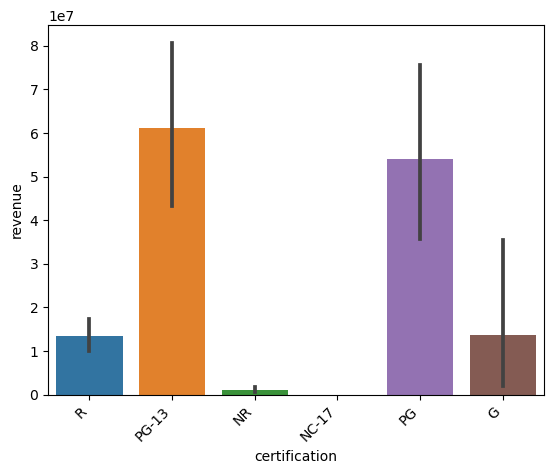

In [47]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='certification', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

## Hypothesis 2: Does the original language affect the revenue of the movie

In [48]:
needed_cols = ['original_language', 'revenue']
df[needed_cols]

,original_language,revenue
0,en,0.0
1,en,0.0
2,en,0.0
3,en,0.0
4,en,0.0
...,...,...
17620,de,0.0
17621,en,0.0
17622,en,0.0
17623,en,0.0


In [49]:
groups ={}

for original_language in df['original_language'].unique():
    temp = df.loc[df['original_language']== original_language, 'revenue']
    groups[original_language] = temp

groups.keys()

dict_keys(['en', 'fa', 'de', 'ja', 'pt', 'zh', 'bg', 'he', 'ru', 'id', 'it', 'vi', 'ko', 'xx', 'mn', 'es', 'fr', 'af', 'uz', 'th', 'so', 'ml', 'os', 'sv', 'sr', 'hi', 'ta', 'cn', 'no', 'bs', 'si', 'hu', 'ar', 'ca', 'el', 'nl', 'ro', 'da', 'tl', 'bn', 'uk', 'ga', 'pl', 'lv', 'cs', 'et', 'fi', 'mk', 'tr', 'mr', 'kn', 'am', 'hr', 'te', 'sq', 'ms', 'is', 'sk', 'kk', 'mt', 'pa', 'ne', 'ak', 'lt', 'ur', 'bo', 'gl', 'gu', 'jv', 'sw', 'ky', 'eu', 'rm', 'sl', 'as', 'ps', 'dz', 'lb', 'hy', 'az', 'my', 'ff', 'ku', 'ka', 'iu', 'sa', 'st', 'km', 'mo', 'lo', 'la', 'lg', 'wo', 'yo', 'ha', 'qu', 'cy', 'sh', 'rw', 'xh', 'or', 'tw', 'ab'])

In [50]:
## Loop through groups dict
for original_language, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {original_language} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[original_language] = data

There were 84 outliers in the en group.
There were 2 outliers in the fa group.
There were 11 outliers in the de group.
There were 10 outliers in the ja group.
There were 1 outliers in the pt group.
There were 9 outliers in the zh group.
There were 1 outliers in the bg group.
There were 1 outliers in the he group.
There were 5 outliers in the ru group.
There were 0 outliers in the id group.
There were 2 outliers in the it group.
There were 1 outliers in the vi group.
There were 4 outliers in the ko group.
There were 0 outliers in the xx group.
There were 0 outliers in the mn group.
There were 13 outliers in the es group.
There were 9 outliers in the fr group.
There were 0 outliers in the af group.
There were 0 outliers in the uz group.
There were 2 outliers in the th group.
There were 0 outliers in the so group.
There were 1 outliers in the ml group.
There were 0 outliers in the os group.
There were 1 outliers in the sv group.
There were 0 outliers in the sr group.
There were 10 outlier

In [51]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for certification, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([certification,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

ValueError: skewtest is not valid with less than 8 samples; 6 samples were given.

In [52]:

## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=327.5463839896934, pvalue=1.8190359112647865e-25)


True

According to the p value, we reject the null hypothesis that there is a significant difference in revenue for those amongst their original language and support the alternative hypothesis that the original language does affect its revenue.

In [53]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for original_language, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'revenue':temp, 'original_language':original_language})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,revenue,original_language
0,0.0,en
1,0.0,en
2,0.0,en
3,0.0,en
4,0.0,en
...,...,...
14409,182000.0,rw
15199,0.0,xh
15858,0.0,or
16142,0.0,tw


In [54]:
## save the values as kg_lost and the labels to the Diet
values = tukeys_data['revenue']
labels = tukeys_data['certification']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

KeyError: 'certification'

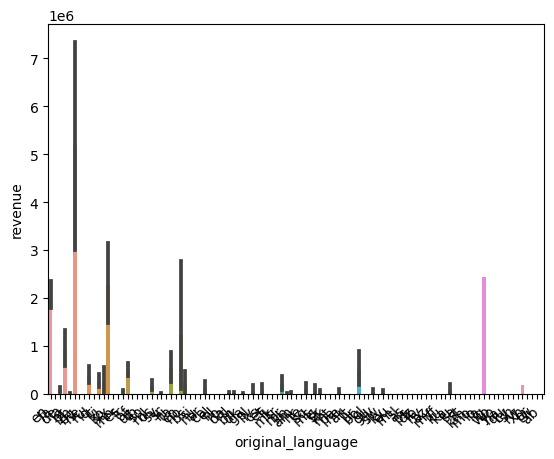

In [55]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='original_language', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
## save the values as kg_lost and the labels to the Diet
values = tukeys_data['revenue']
labels = tukeys_data['certification']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

In [ ]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='original_language', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

## Hypthothesis 3: do movies released from 2018-2019 make more revenue than those from 2020-2021

In [57]:
df['small_runtime'] = df['runtime'] < 2.5
df['small_runtime'].value_counts()

False    16808
True       817
Name: small_runtime, dtype: int64

In [58]:
needed_cols = ['small_runtime', 'revenue']
df[needed_cols]

,small_runtime,revenue
0,False,0.0
1,False,0.0
2,False,0.0
3,False,0.0
4,False,0.0
...,...,...
17620,False,0.0
17621,False,0.0
17622,False,0.0
17623,False,0.0


In [62]:
small_df = df.loc[df['small_runtime']==True, needed_cols]
small_df

,small_runtime,revenue
9,True,0.0
16,True,0.0
25,True,0.0
26,True,0.0
32,True,0.0
...,...,...
17500,True,0.0
17579,True,0.0
17585,True,0.0
17614,True,0.0


In [63]:
big_df = df.loc[df['small_runtime']==False, needed_cols]
big_df

,small_runtime,revenue
0,False,0.0
1,False,0.0
2,False,0.0
3,False,0.0
4,False,0.0
...,...,...
17620,False,0.0
17621,False,0.0
17622,False,0.0
17623,False,0.0


In [64]:
plot_df = pd.concat((small_df, big_df), axis=0)
plot_df

,small_runtime,revenue
9,True,0.0
16,True,0.0
25,True,0.0
26,True,0.0
32,True,0.0
...,...,...
17620,False,0.0
17621,False,0.0
17622,False,0.0
17623,False,0.0


In [66]:
small_df_group = small_df['revenue']
big_df_group = big_df['revenue']
display(small_df_group.head(), big_df_group.head())

9     0.0
16    0.0
25    0.0
26    0.0
32    0.0
Name: revenue, dtype: float64

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: revenue, dtype: float64

In [71]:
result = stats.ttest_ind(small_df_group, big_df_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=-11.598009163434698, pvalue=5.529334499492891e-31)


True

## conclusion
- - our welch t test returned a p=value of <.05, so we reject the null hypothesis and support the alternative hypothesis that runtimes less than 2.5 hours generate more revenue 

<Axes: xlabel='small_runtime', ylabel='revenue'>

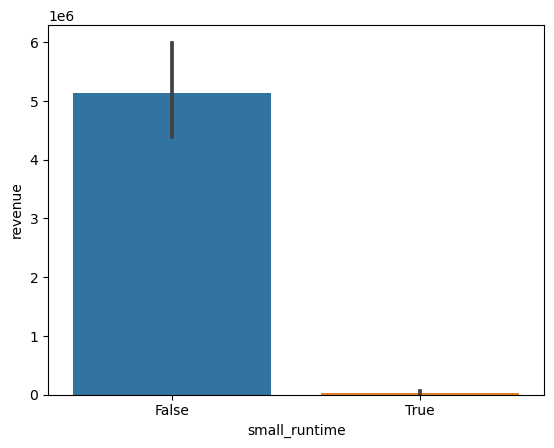

In [72]:
sns.barplot(data=plot_df, x='small_runtime',y='revenue')